In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_datareader import data as web
import warnings

warnings.filterwarnings("ignore")
    

In [15]:
prices = pd.DataFrame()
tickers = ['ITUB3.SA', 'BBDC3.SA', 'BBAS3.SA', 'SANB3.SA', '^BVSP']
for i in tickers:
    prices[i] = web.get_data_yahoo(i,'01/01/2008')['Adj Close']
prices.head()

,ITUB3.SA,BBDC3.SA,BBAS3.SA,SANB3.SA,^BVSP
Date,,,,,
2008-01-02,7.677836,5.563160,12.739302,-37.718258,62815.0
2008-01-03,7.458467,5.494794,12.546928,-37.718258,62892.0
2008-01-04,7.458467,5.610476,12.401587,-37.718258,61037.0
2008-01-07,7.348784,5.666003,12.696550,-37.718258,60772.0
2008-01-08,7.403629,5.794404,12.957327,-37.718258,62081.0


In [16]:
prices.rename(columns ={'ITUB3.SA':'ITUB', 'BBDC3.SA':'BBDC','BBAS3.SA':'BBAS','SANB3.SA':'SANB', '^BVSP':'IBOV'},inplace = True)
prices['IBOV'] = prices['IBOV']/1000
prices.reset_index(inplace = True)

In [17]:
prices.dropna(subset = ['IBOV'], inplace = True)
prices.IBOV.isnull().sum()

0

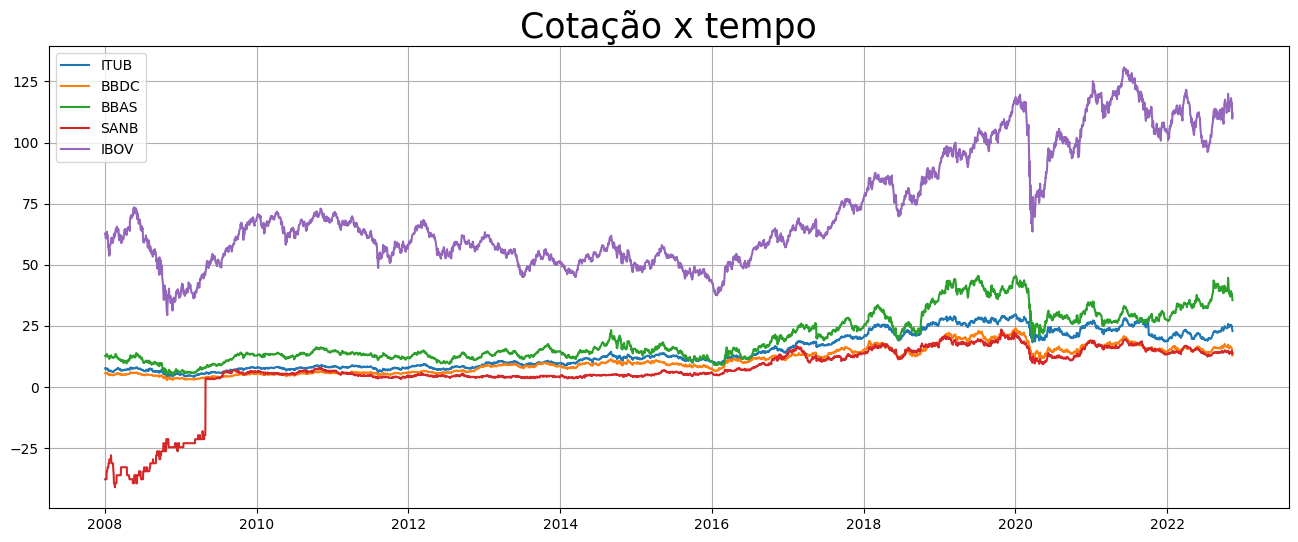

In [18]:
tickers = list(prices.drop(['Date'], axis = 1).columns)
plt.figure(figsize=(16,6))

for i in tickers:
        plt.plot(prices['Date'], prices[i])
plt.legend(tickers)
plt.grid()
plt.title("Cotação x tempo", fontsize = 25)
plt.show()

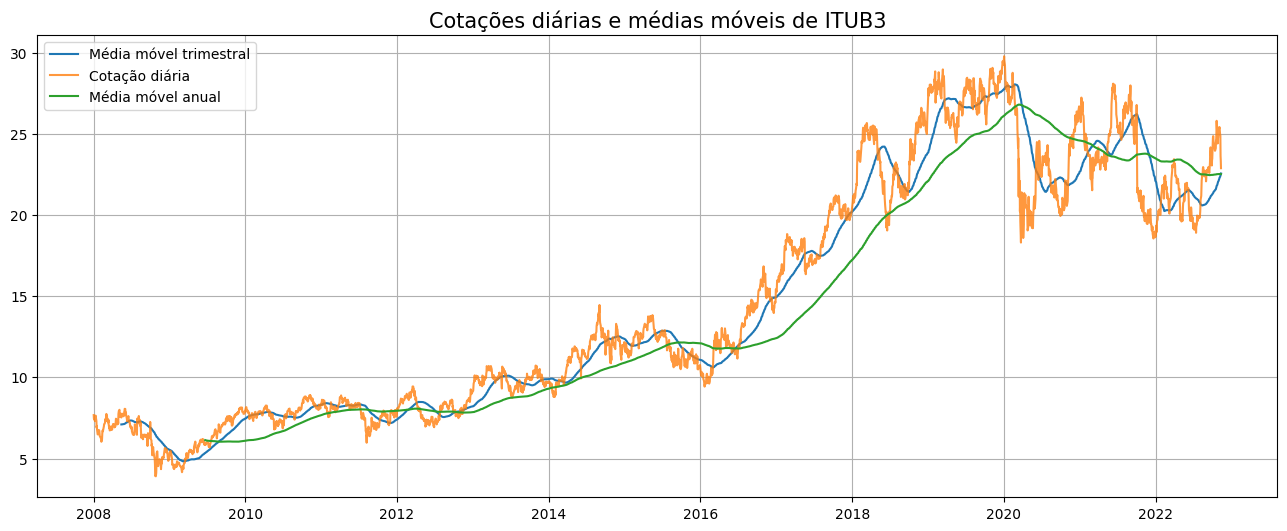

In [19]:
plt.figure(figsize=(16,6))
plt.plot(prices['Date'],prices['ITUB'].rolling(window = 90).mean())
plt.plot(prices['Date'], prices['ITUB'], alpha = 0.8)
plt.plot(prices['Date'],prices['ITUB'].rolling(window = 365).mean())
plt.grid()
plt.title('Cotações diárias e médias móveis de ITUB3', fontsize = 15)
plt.legend(['Média móvel trimestral','Cotação diária','Média móvel anual'])
plt.show()

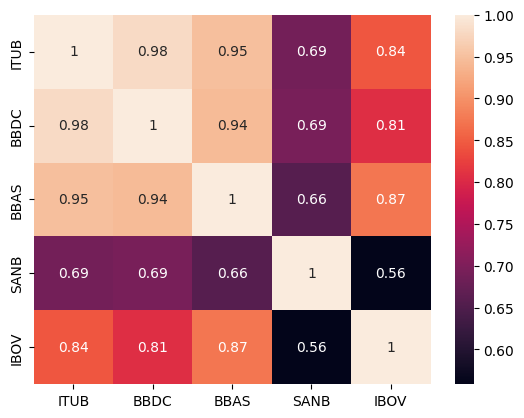

In [20]:
sns.heatmap(prices.corr(), annot = True)
plt.show()

In [21]:
returns = pd.DataFrame()
for i in tickers:
    returns[i] = prices[i].pct_change()
returns['Date'] = prices['Date']

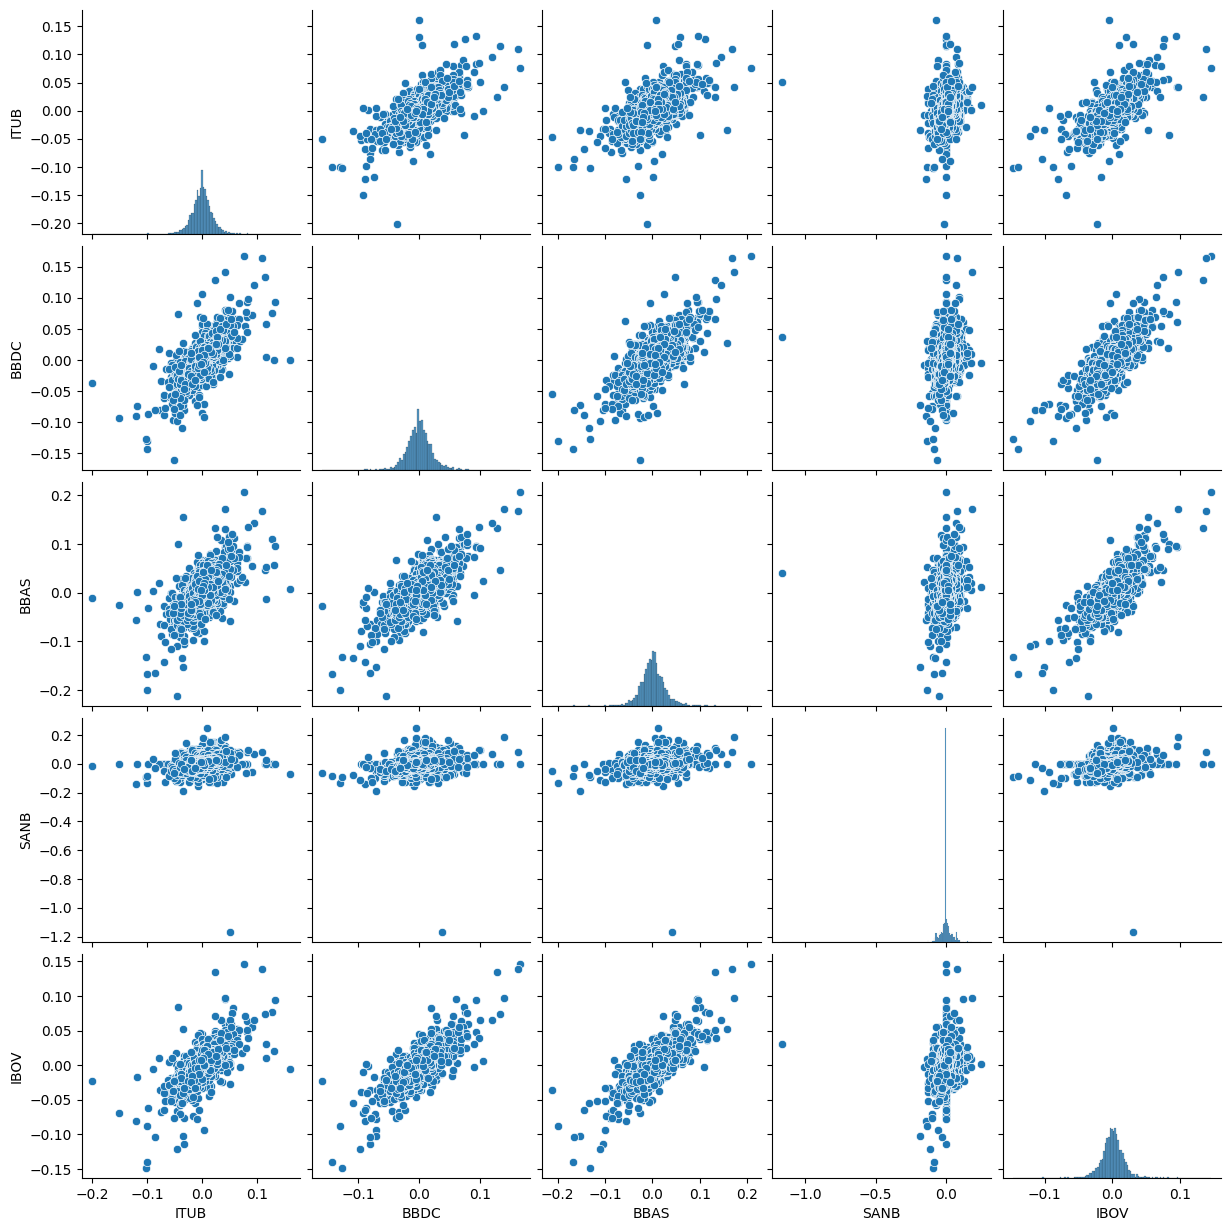

In [22]:
sns.pairplot(returns)
plt.show()

In [ ]:
returns.describe()

In [ ]:
sns.distplot(returns['IBOV'].dropna())

In [ ]:
return_sum = pd.DataFrame()
for ticker in tickers:
    return_sum[ticker] = (returns[ticker]+1).cumprod()
return_sum['Date'] = returns['Date']

plt.figure(figsize=(16,6))
plt.plot(return_sum['Date'], return_sum.drop(['Date'], axis = 1), alpha = 0.9)
plt.legend(tickers)
plt.title("Retorno x tempo", fontsize = 15)
plt.grid()
plt.show()